<a href="https://colab.research.google.com/github/Jashmavani9002/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

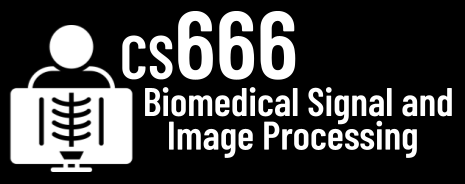

# Assignment 1

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [8]:
!pip install biosppy

**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [9]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [10]:
SAMPLING_RATE = metadata['sampling_rate'] # As seen in ECG file

number_of_samples = len(signal)

# Calculate the duration of the ECG recording in seconds
SECONDS = number_of_samples / SAMPLING_RATE

print(f"Sampling Rate: {SAMPLING_RATE} Hz")
print(f"Duration: {SECONDS} seconds")


Sampling Rate: 1000 Hz
Duration: 15.0 seconds


**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

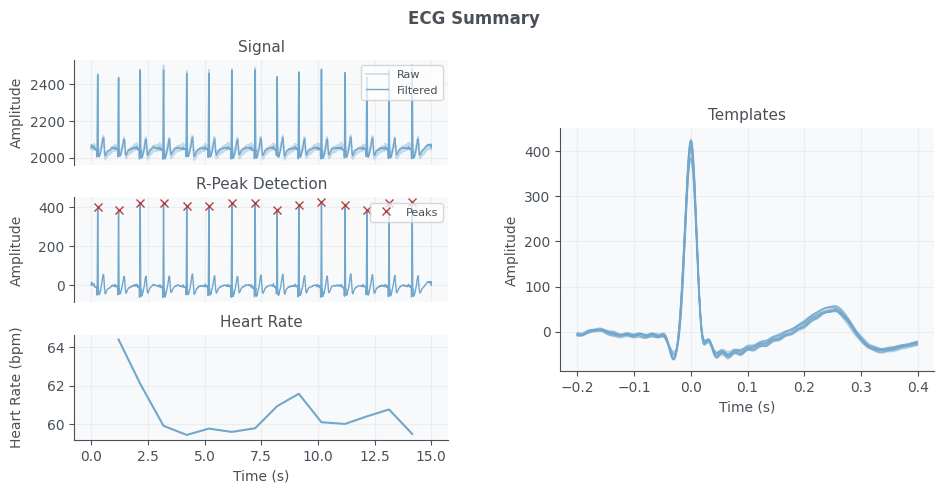

In [11]:
from biosppy.signals import ecg
out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

Text(0, 0.5, 'Amplitude')

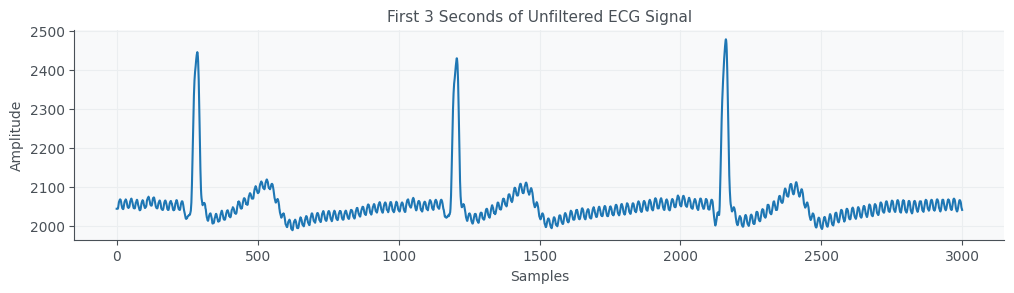

In [12]:
###plot unfiltered signal
samples_for_3_seconds = 3 * SAMPLING_RATE

# Plot the first 3 seconds of the unfiltered signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal[:samples_for_3_seconds])
plt.title('First 3 Seconds of Unfiltered ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')



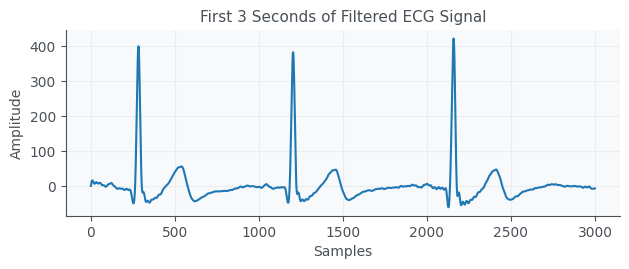

In [13]:
### Plot filtered signal
# Plot the first 3 seconds of the filtered signal
plt.subplot(2, 1, 2)
plt.plot(out['filtered'][:samples_for_3_seconds])
plt.title('First 3 Seconds of Filtered ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

 From the figure we can se see the P, Q, R, S, T waves in signal.

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

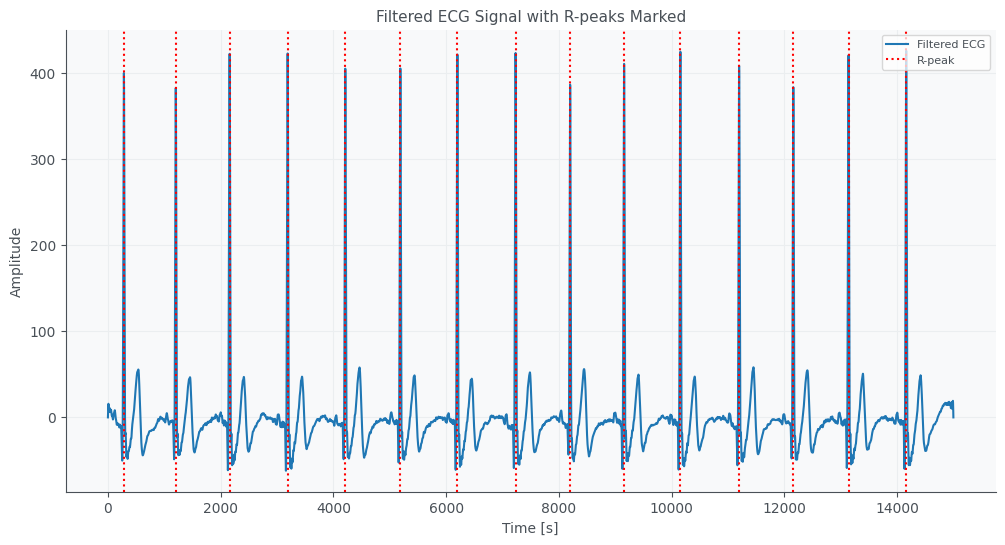

In [14]:
# Plot the whole filtered signal
plt.figure(figsize=(12, 6))
plt.plot(out['filtered'], label='Filtered ECG')
plt.title('Filtered ECG Signal with R-peaks Marked')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Mark the R-peaks
for r_peak in out['rpeaks']:
    plt.axvline(x=r_peak, color='r', ls=':', label='R-peak')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [15]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

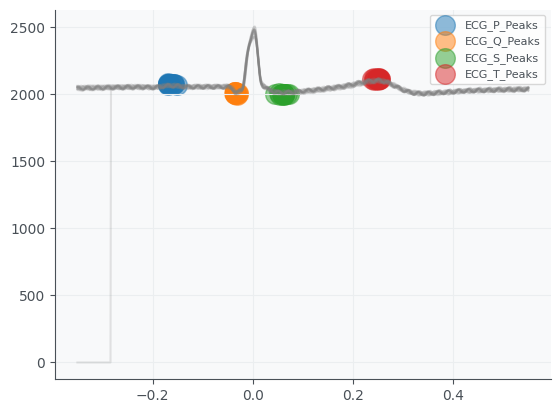

In [16]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

import neurokit2 as nk
import numpy as np

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak")

_, waves_peak = nk.ecg_delineate(signal,
                                 out['rpeaks'],
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [17]:
# TODO Does the detection work well?
## Yes, But in unfiltered we cannot clearly se the P, Q, S and T spot properly.

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [18]:
!pip install sleepecg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.4 MB/s eta 0:00:00


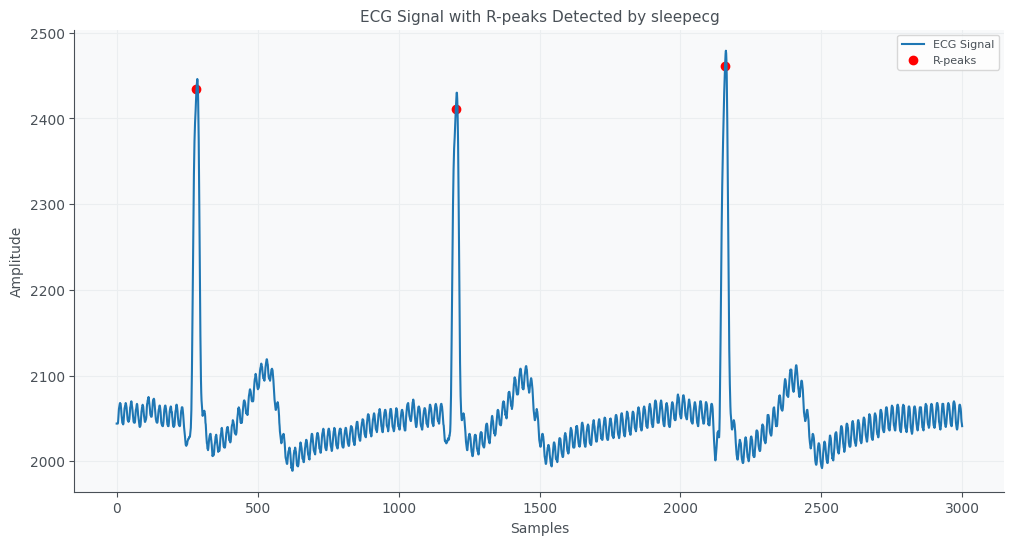

In [19]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

import sleepecg

# Detect R-peaks
r_peaks = sleepecg.detect_heartbeats(signal, SAMPLING_RATE)

plt.figure(figsize=(12, 6))
plt.plot(signal[:samples_for_3_seconds], label="ECG Signal")
plt.scatter(r_peaks[r_peaks < samples_for_3_seconds], signal[r_peaks[r_peaks < samples_for_3_seconds]], color='red', label='R-peaks')
plt.title("ECG Signal with R-peaks Detected by sleepecg")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error
# Calculate MSE between the R-peak indices detected by BioSPPY and sleepecg
mse = mean_squared_error(out['rpeaks'], r_peaks)
print(f"MSE between BioSPPY and sleepecg R-peaks: {mse}")

MSE between BioSPPY and sleepecg R-peaks: 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [21]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [22]:
# Finally, run the delineation on the filtered signal from BioSPPY.

In [36]:

# Delineate the unfiltered ECG signal
_, delineated_unfiltered = nk.ecg_delineate(signal, out['rpeaks'], sampling_rate=SAMPLING_RATE, method="dwt")


In [37]:
# Filter the ECG signal
lowcut = 5
highcut = 40

filtered_signal = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=lowcut, highcut=highcut)

# Delineate the filtered ECG signal
_, delineated_filtered = nk.ecg_delineate(out['filtered'], out['rpeaks'], sampling_rate=SAMPLING_RATE, method="peak")

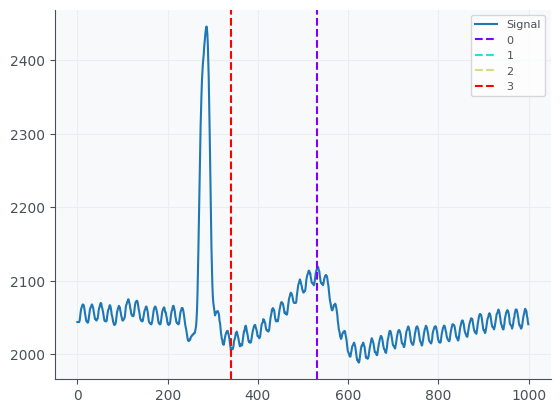

In [41]:
import matplotlib.pyplot as plt

# Function to plot delineated signal
plot = nk.events_plot([delineated_unfiltered['ECG_T_Peaks'][:1],
                       delineated_unfiltered['ECG_P_Peaks'][:1],
                       delineated_unfiltered['ECG_Q_Peaks'][:1],
                       delineated_unfiltered['ECG_S_Peaks'][:1]], signal[:1000])





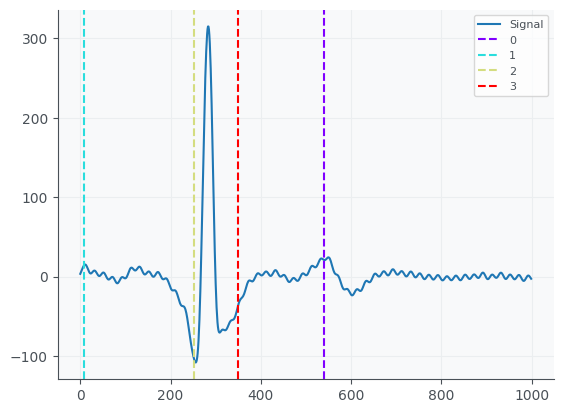

In [40]:
plot = nk.events_plot([delineated_filtered['ECG_T_Peaks'][:1],
                       delineated_filtered['ECG_P_Peaks'][:1],
                       delineated_filtered['ECG_Q_Peaks'][:1],
                       delineated_filtered['ECG_S_Peaks'][:1]], filtered_signal[:1000])

In [30]:
# Which one works the best?


In the filtered signal we get clear spike or line for P, Q , S and T waves.
SO filtered waves works well.


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#